In [1]:
# CREDITS
#https://www.youtube.com/watch?v=7azmUg6XZA0 Open Source Student vaderSentiment and pandas video
#https://www.youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS Corey Schafer pandas playlist videos
#https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

# CITE 
#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
import pandas as pd

#hardcoded... 
file = 'results/crashcourse.json'
data = None

with open(file, 'r') as f:
    data = json.load(f)

channel_id, stats = data.popitem()
print(channel_id)

channel_stats = stats['channel_statistics']

video_stats = stats['video_data']

UCX6b17PVsYBQ0ip5gyeme-Q


In [2]:
#analyse video stats
#video_stats.items() value returned after df.popitem()
sorted_vids = sorted(video_stats.items(), key=lambda item: int(item[1]['viewCount']), reverse=True)
#in reverse/descending order so most views in the beginning

stats = []
for vid in sorted_vids:
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    
    #sometimes videos have comments disabled so some might not have the key 'commentCount'
    key = "commentCount"
    if key in vid[1].keys():
        comments = int(vid[1]["commentCount"]) 
    else:
        comments = 0

    duration = vid[1]['duration']
    stats.append([video_id, title, views, likes, comments, duration])

df = pd.DataFrame(stats, columns=['video_id', 'title', 'views', 'likes', 'comments','duration'])

df.head(10)
#prints the sorted vids by most views/based on viewCount 
#Top 10 videos correlation with comment sentiment?

,video_id,title,views,likes,comments,duration
0,vo4pMVb0R6M,Intro to Psychology: Crash Course Psychology #1,12787803,215402,7144,PT10M54S
1,1wo2TLlMhiw,Conflict in Israel and Palestine: Crash Course...,10942320,182711,0,PT12M53S
2,uBGl2BujkPQ,Introduction to Anatomy & Physiology: Crash Co...,8111652,117613,3152,PT11M20S
3,bO7FQsCcbD8,"The Constitution, the Articles, and Federalism...",7107838,63457,6493,PT13M4S
4,Qymp_VaFo9M,Let's Talk About Sex: Crash Course Psychology #27,6812615,89790,4173,PT11M36S
5,3ez10ADR_gM,Intro to Economics: Crash Course Econ #1,6512609,93389,4427,PT12M9S
6,0RRVV4Diomg,The Periodic Table: Crash Course Chemistry #4,6505958,71498,3206,PT11M22S
7,1A_CAkYt3GY,What is Philosophy?: Crash Course Philosophy #1,6201843,118890,5937,PT10M35S
8,Cd2ch4XV84s,How World War I Started: Crash Course World Hi...,5973545,61702,4953,PT9M10S
9,GCQfMWAikyU,The Great Depression: Crash Course US History #33,5933162,59880,5315,PT14M27S


# Crashcourse's top 10 videos based on highest viewCount in correlation to their respective comment sentiment

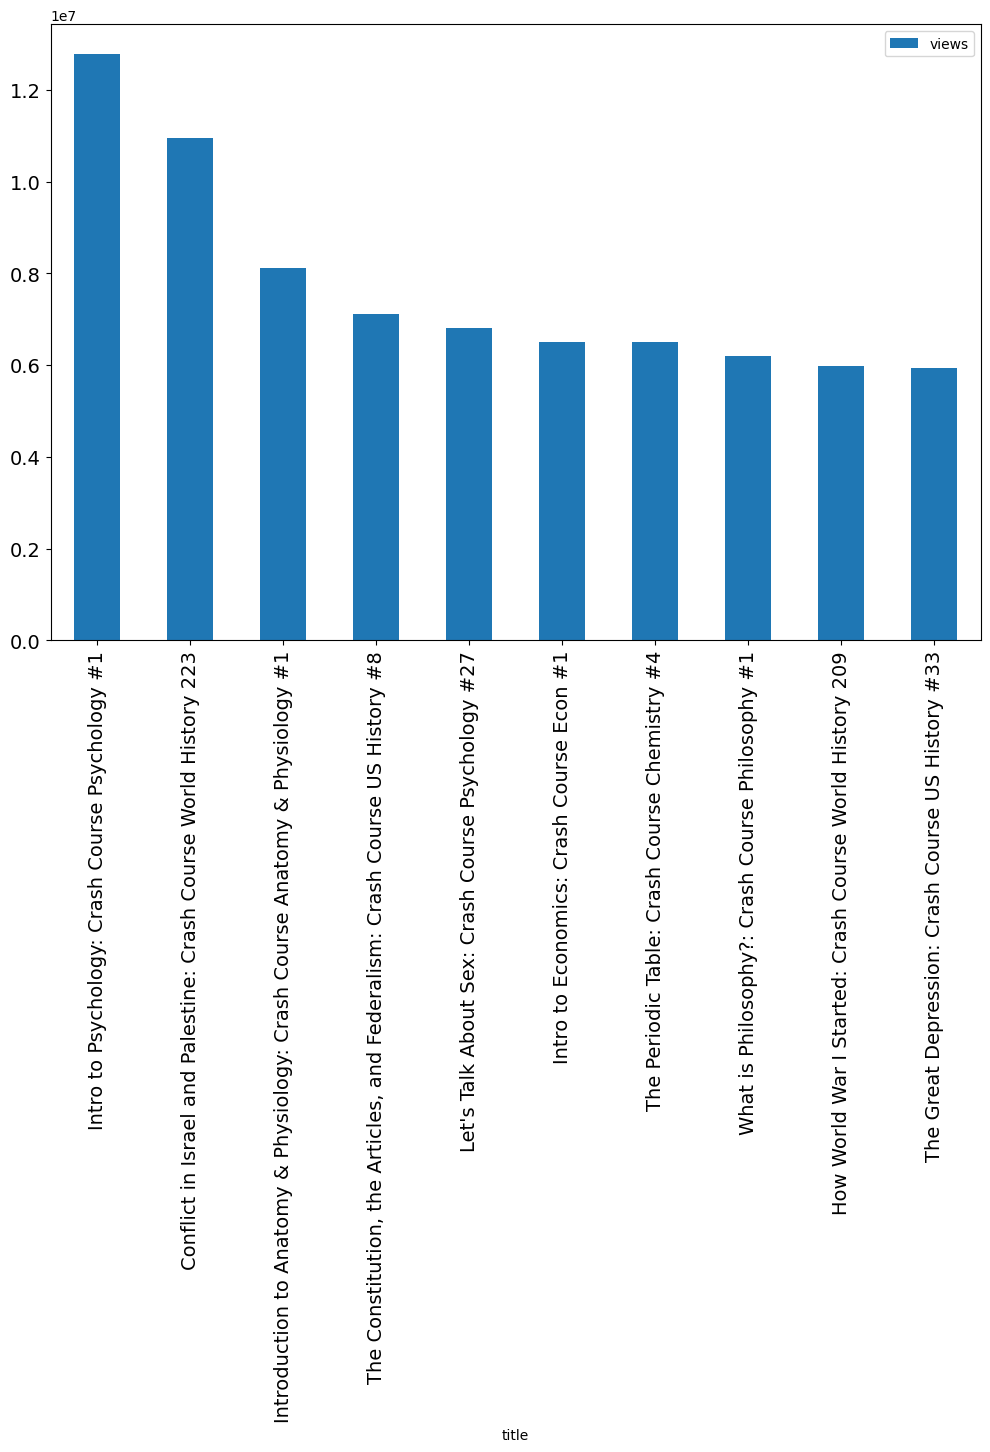

In [3]:
top10 = df.head(10)

ax = top10.plot.bar(x='title', y='views', figsize=(12,8), fontsize=14)

In [4]:
likes_avg = top10['likes'].mean()
comments_avg = top10['comments'].mean()

print(f"""
Top 10
Average likes of 10 videos = {likes_avg}
Average comments of 10 videos = {comments_avg}
         """)


Top 10
Average likes of 10 videos = 107433.2
Average comments of 10 videos = 4480.0
         


In [4]:
analyzer = SentimentIntensityAnalyzer()

#drop/delete row of video that has comments disabled as comments json file of that video does not exist in folder result/crashcourse
#Corey Schafer https://www.youtube.com/watch?v=HQ6XO9eT-fc
filter = top10['comments'] == 0
top10 = top10.drop(index=top10[filter].index)

for videoID in top10['video_id']:

    dataframe = pd.read_json(f'results/crashcourse/{videoID}.json')
    
    positive = []
    negative = []
    neutral = []
    compound = []
    sentiment = []

    #for line in dataframe['comment_text']:
    for line in range(dataframe.shape[0]): 
#range() method returns total number or length or indexes of 2d array data's rows [0] or data's columns [1]
#use df.shape[0] to only loop through rows while shape[1] gives columns

        comments = dataframe.iloc[line, 1] #iloc returns the value of looped lines/rows of the first[1] column 'Comment' key index
    #print(comments)
        comments_analyzed = analyzer.polarity_scores(comments)
    #print(comments_analyzed)
    #print("{:-<65} {}".format(comments, str(comments_analyzed)))
    
        if comments_analyzed["compound"] >= 0.05:
            eachsentiment = 'positive'
        elif comments_analyzed["compound"] <= -0.05:
            eachsentiment = 'negative'
        else:
            eachsentiment = 'neutral'
    
    #if comments_analyzed["compound"] >= 0:
        #sentiment = 'positive'
    #else:
        #sentiment = 'negative'

#RUN ONCE
        negative.append(comments_analyzed["neg"])
        #negative += comments_analyzed["neg"] is not suitable for this

        positive.append(comments_analyzed["pos"])
        #print(positive)

        neutral.append(comments_analyzed["neu"])
        #print(neutral)

        compound.append(comments_analyzed["compound"])
        #print(compound)

        sentiment.append(eachsentiment)





#add new columns to each dataframe of each top 10 videos

#add new columns and their values to dataframe version of json
    dataframe["negative"] = negative #create and add new column named Negative
    dataframe["neutral"] = neutral
    dataframe["positive"] = positive
    dataframe["compound"] = compound
    dataframe["sentiment"] = sentiment

#pd.set_option('display.max_columns', None)
#print(df.head())


#print(df1.nlargest(5, ['Negative']))
#print(df1.nlargest(5, ['Neutral']))
#print(df1.nlargest(5, ['Positive']))


#average sentiment scores of each top 10 video comments
    neg_avg = dataframe['negative'].mean()
    #print(neg_avg)

    neu_avg = dataframe['neutral'].mean()
    #print(neu_avg)

    pos_avg = dataframe['positive'].mean()
    #print(pos_avg)

    compound_avg = dataframe['compound'].mean()
    #print(compound_avg)



#https://www.geeksforgeeks.org/data-visualization-different-charts-python/
#A pie chart represents numbers in percentages, and the total sum of all segments needs to equal 100%
#bar chart of 2 bars
#x axis = video's neg and pos averages
#y axis = average score values


    posavgpercentage = pos_avg*100
    negavgpercentage = neg_avg*100
    neuavgpercentage = neu_avg*100
    compoundavgpercentage = compound_avg*100

    print('dataframe of {} \n positive % = {} \n negative % = {} \n neutral % = {} \n compound % = {}'.format(videoID, posavgpercentage, negavgpercentage, neuavgpercentage, compoundavgpercentage))

#if compoundavgpercentage1 > 50:
#   print('df1 sentiment is positive overall')
#elseif compoundavgpercentage1 < 50:
#   print('df1 sentiment is negative overall')
#else:
#   print('df1 sentiment is neutral overall')

dataframe of vo4pMVb0R6M 
 positive % = 18.979520745506985 
 negative % = 5.0958952740181935 
 neutral % = 75.92422897714665 
 compound % = 26.19463501220324
dataframe of uBGl2BujkPQ 
 positive % = 22.54978843441467 
 negative % = 4.631264692054537 
 neutral % = 72.67752703338036 
 compound % = 37.4728490832158
dataframe of bO7FQsCcbD8 
 positive % = 12.922762495156913 
 negative % = 7.800987989151492 
 neutral % = 79.23775668345601 
 compound % = 10.04881828748547
dataframe of Qymp_VaFo9M 
 positive % = 14.056644880174291 
 negative % = 6.88322440087146 
 neutral % = 78.73338779956427 
 compound % = 15.033398692810456
dataframe of 3ez10ADR_gM 
 positive % = 18.14378040305768 
 negative % = 7.17866574009729 
 neutral % = 74.5727936066713 
 compound % = 21.21439888811675
dataframe of 0RRVV4Diomg 
 positive % = 17.135102040816328 
 negative % = 5.956612244897959 
 neutral % = 76.86734693877551 
 compound % = 20.64954285714286
dataframe of 1A_CAkYt3GY 
 positive % = 19.54303617203076 
 ne

In [6]:
print(top10['comments'])

0    7144
1       0
2    3152
3    6493
4    4173
5    4427
6    3206
7    5937
8    4953
9    5315
Name: comments, dtype: int64


In [6]:
filter = top10['comments'] == 0
top10 = top10.drop(index=top10[filter].index)

#Corey Schafer https://www.youtube.com/watch?v=HQ6XO9eT-fc

In [7]:
top10

,video_id,title,views,likes,comments,duration
0,vo4pMVb0R6M,Intro to Psychology: Crash Course Psychology #1,12787803,215402,7144,PT10M54S
2,uBGl2BujkPQ,Introduction to Anatomy & Physiology: Crash Co...,8111652,117613,3152,PT11M20S
3,bO7FQsCcbD8,"The Constitution, the Articles, and Federalism...",7107838,63457,6493,PT13M4S
4,Qymp_VaFo9M,Let's Talk About Sex: Crash Course Psychology #27,6812615,89790,4173,PT11M36S
5,3ez10ADR_gM,Intro to Economics: Crash Course Econ #1,6512609,93389,4427,PT12M9S
6,0RRVV4Diomg,The Periodic Table: Crash Course Chemistry #4,6505958,71498,3206,PT11M22S
7,1A_CAkYt3GY,What is Philosophy?: Crash Course Philosophy #1,6201843,118890,5937,PT10M35S
8,Cd2ch4XV84s,How World War I Started: Crash Course World Hi...,5973545,61702,4953,PT9M10S
9,GCQfMWAikyU,The Great Depression: Crash Course US History #33,5933162,59880,5315,PT14M27S
